In [15]:
# segments for LIGO Hanford detector
from gwosc.timeline import get_segments
O2start = (1165577780-86400) # this is 675 * 128
O2end = (1165577780-640) #(128*5=640) so 670 possible 128's and then 5 are too close so excluded
flag = "H1_CBC_CAT2"  # get all data that passes the CAT2 veto (i.e. data quality is good)
H1segs = get_segments(flag, O2start, O2end)
H1nocbc = get_segments("H1_NO_CBC_HW_INJ", O2start, O2end)
H1noburst = get_segments("H1_NO_BURST_HW_INJ", O2start, O2end)   
from gwpy.segments import SegmentList
newH1segs = (SegmentList(H1segs) & SegmentList(H1nocbc)) & SegmentList(H1noburst)
# segments for LIGO Livingston detector
flag = "L1_CBC_CAT2"
L1segs = get_segments(flag, O2start, O2end)  
L1nocbc = get_segments("L1_NO_CBC_HW_INJ", O2start, O2end)
L1noburst = get_segments("L1_NO_BURST_HW_INJ", O2start, O2end)
newL1segs = (SegmentList(L1segs) & SegmentList(L1nocbc)) & SegmentList(L1noburst)

In [16]:
print(newH1segs)

[(1165491380, 1165503811)
 (1165508628, 1165518947)
 (1165519432, 1165531175)
 (1165531632, 1165577140)]


In [17]:
for i in range(len(newH1segs)):
    print('start time',newH1segs[i][0],'of duration',newH1segs[i][1]-newH1segs[i][0],'to',newH1segs[i][1])

start time 1165491380 of duration 12431 to 1165503811
start time 1165508628 of duration 10319 to 1165518947
start time 1165519432 of duration 11743 to 1165531175
start time 1165531632 of duration 45508 to 1165577140


In [43]:
listofsegments = []
for i in range(len(newH1segs)):
    length = int((newH1segs[i][1]-newH1segs[i][0])/128)
    print(length)
    for x in range(length):
        listofsegments.append([(newH1segs[i][0]+(128*x)),(newH1segs[i][0]+(128*(x+1)))])
                              
print(listofsegments[0][0])
print(len(listofsegments))
print(listofsegments)

97
80
91
355
1165491380
623
[[1165491380, 1165491508], [1165491508, 1165491636], [1165491636, 1165491764], [1165491764, 1165491892], [1165491892, 1165492020], [1165492020, 1165492148], [1165492148, 1165492276], [1165492276, 1165492404], [1165492404, 1165492532], [1165492532, 1165492660], [1165492660, 1165492788], [1165492788, 1165492916], [1165492916, 1165493044], [1165493044, 1165493172], [1165493172, 1165493300], [1165493300, 1165493428], [1165493428, 1165493556], [1165493556, 1165493684], [1165493684, 1165493812], [1165493812, 1165493940], [1165493940, 1165494068], [1165494068, 1165494196], [1165494196, 1165494324], [1165494324, 1165494452], [1165494452, 1165494580], [1165494580, 1165494708], [1165494708, 1165494836], [1165494836, 1165494964], [1165494964, 1165495092], [1165495092, 1165495220], [1165495220, 1165495348], [1165495348, 1165495476], [1165495476, 1165495604], [1165495604, 1165495732], [1165495732, 1165495860], [1165495860, 1165495988], [1165495988, 1165496116], [11654961

In [21]:
print(newL1segs)

[(1165495989, 1165497654)
 (1165497660, 1165497666)
 (1165502899, 1165502930)
 (1165531976, 1165532039)
 (1165532040, 1165532394)
 (1165532395, 1165532581)
 (1165532582, 1165533085)
 (1165536836, 1165537764)
 (1165560594, 1165561414)
 (1165561415, 1165561545)
 (1165561546, 1165563486)
 (1165563487, 1165563884)
 (1165563885, 1165564104)
 (1165564105, 1165564296)
 (1165564297, 1165564411)
 (1165564412, 1165564593)
 (1165564594, 1165565363)
 (1165565364, 1165565477)
 (1165565478, 1165565996)
 (1165565997, 1165571297)]


In [22]:
for i in range(len(newL1segs)):
    print('start time',newL1segs[i][0],'of duration',newL1segs[i][1]-newL1segs[i][0],'to',newL1segs[i][1])

start time 1165495989 of duration 1665 to 1165497654
start time 1165497660 of duration 6 to 1165497666
start time 1165502899 of duration 31 to 1165502930
start time 1165531976 of duration 63 to 1165532039
start time 1165532040 of duration 354 to 1165532394
start time 1165532395 of duration 186 to 1165532581
start time 1165532582 of duration 503 to 1165533085
start time 1165536836 of duration 928 to 1165537764
start time 1165560594 of duration 820 to 1165561414
start time 1165561415 of duration 130 to 1165561545
start time 1165561546 of duration 1940 to 1165563486
start time 1165563487 of duration 397 to 1165563884
start time 1165563885 of duration 219 to 1165564104
start time 1165564105 of duration 191 to 1165564296
start time 1165564297 of duration 114 to 1165564411
start time 1165564412 of duration 181 to 1165564593
start time 1165564594 of duration 769 to 1165565363
start time 1165565364 of duration 113 to 1165565477
start time 1165565478 of duration 518 to 1165565996
start time 116

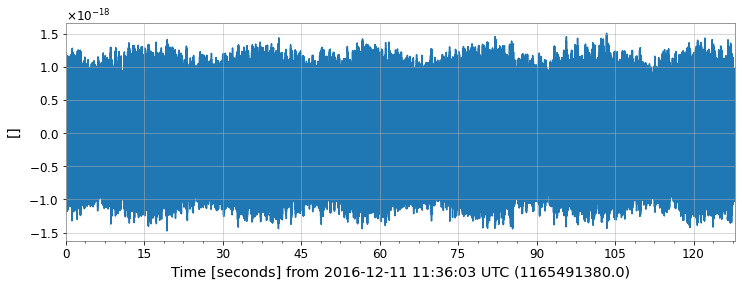

In [46]:

import gwpy
from gwpy.timeseries import TimeSeries
from pycbc.types.timeseries import TimeSeries as PyCBCTimeSeries
duration = 128 
gpsstart = 1165491380

gpsend = gpsstart + duration
samplerate = 16384

detector = "H1"
data3 = TimeSeries.fetch_open_data(
    detector,
    gpsstart,
    gpsend,
    sample_rate=samplerate,
    format='hdf5',
    host='https://www.gw-openscience.org',
    verbose=False,
    cache=True,
)
pycbcdata = PyCBCTimeSeries(data3.data, delta_t=(1 / data3.sample_rate.value))
data3.plot()

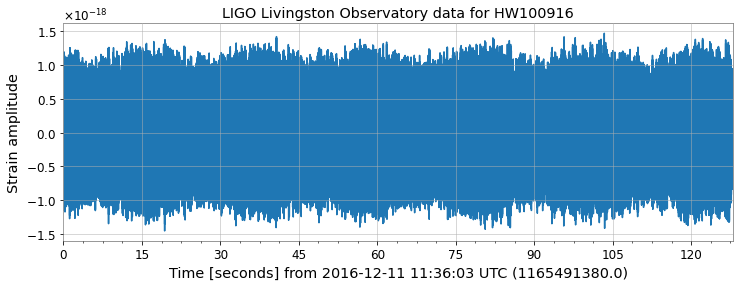

In [23]:
1165491380
import gwpy
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data("L1", 1187008880, 1187008884, sample_rate=16384, format='hdf5', host='https://www.gw-openscience.org', verbose=False)
data2 = TimeSeries.fetch_open_data('H1', 1165491380, 1165491380+128)
data2.plot(title='LIGO Livingston Observatory data for HW100916',ylabel='Strain amplitude')

In [3]:
import gwpy
from gwpy.timeseries import TimeSeries
from pycbc.types.timeseries import TimeSeries as PyCBCTimeSeries
data4 = TimeSeries.find(
    "H1:DCS-CALIB_STRAIN_C02", # the channel name
    1165491380.0,  # the GPS start time
    1165491508.0,  # the GPS end time
)

In [2]:
TimeSeries.find("H1:DCS-CALIB_STRAIN_C02", 1182601216.0, 1182601216.0 + 10)

<TimeSeries([-6.93618901e-19, -6.97601702e-19, -6.97301518e-19,
             ...,  3.95364256e-19,  3.86072613e-19,
              3.29048719e-19]
            unit=Unit("strain"),
            t0=<Quantity 1.18260122e+09 s>,
            dt=<Quantity 6.10351562e-05 s>,
            name='H1:DCS-CALIB_STRAIN_C02',
            channel=<Channel("H1:DCS-CALIB_STRAIN_C02", 16384.0 Hz) at 0x2b61a0be4d50>)>